# Тема: Влияние эпохи на лексику и темы в произведениях русской классической литературы

### Постановка задачи
- **Целевая аудитория**: литературоведы, историки, преподаватели русской литературы.
- **Цель**: анализировать, как менялась лексика и тематическое наполнение произведений русской классики в разные исторические периоды.

### Аналитика
- Исследовать существующие работы по истории русской литературы, лингвистические исследования о развитии русского языка, а также проекты, связанные с текстовым анализом литературных произведений.

Исследования и работы по истории русской литературы охватывают широкий спектр тем и периодов, от древнейшей литературы до современности. Например, исследования охватывают историю литературы конца XIX - начала XX века, включая библиографические указатели с тысячами записей, освещающих развитие литературы, критики, журналистики и цензуры за этот период https://archive.org/details/istoriya_russkoy_literatury_XIX_XX.

История русской литературы начинается с древнерусской литературы, активно развивавшейся после принятия православия в 988 году, что привело к появлению таких значимых произведений, как "Повесть временных лет" Нестора и "Слово о полку Игореве" https://www.advantour.com/rus/russia/culture/literature.htm. Средневековая русская литература отмечена развитием агиографии и интересом к произведениям о путешествиях, в то время как XVIII век стал "золотым веком" русской литературы с такими направлениями, как классицизм, реализм и сентиментализм https://www.advantour.com/rus/russia/culture/literature.htm.




1. **Препроцессинг текста на русском языке**: Важным аспектом обработки текста является препроцессинг, который включает в себя лемматизацию и удаление стоп-слов. Этот процесс позволяет улучшить качество последующего анализа, избегая искажений, вызванных формами слов и их грамматическими характеристиками. Один из примеров обработки текста на русском языке демонстрируется на примере работы с текстом "Яблони цветут" Зинаиды Гиппиус, где проводится лемматизация и анализ текста с помощью spaCy https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/Multilingual/Russian/01-Preprocessing-Russian.html.

2. **Анализ тональности на русском языке**: Проект на GitHub, посвященный анализу тональности текстов на русском языке, использует предварительно обученные трансформеры, такие как Multilingual BERT и Multilingual Universal Sentence Encoder, для классификации тональности. В исследовании были использованы различные наборы данных, включая RuReviews и RuSentiment, что позволило достичь значительных результатов в анализе тональности русскоязычных текстов https://github.com/sismetanin/sentiment-analysis-in-russian.

Эти ресурсы и проекты иллюстрируют применение современных методов обработки естественного языка и машинного обучения для анализа русскоязычных литературных текстов и могут служить основой для дальнейших исследований в этой области. Использование Python и доступных библиотек NLP, таких как spaCy, NLTK, и предварительно обученных моделей, открывает новые возможности для глубокого понимания текстовых данных и извлечения значимой информации из литературных произведений.







### Сбор данных
- **Источники данных**: произведения из открытых электронных библиотек (https://limbook.net/book/anna-karenina.html)
- **Корпус текстов**: выбранные произведения "Храбрые беглецы" Александра Куприна и "Анна Каренина" Льва Толстого
- **Предобработка**: выполнить токенизацию, лемматизацию, удаление стоп-слов.

### Лингвистический компонент
- Применить тематическое моделирование для выявления основных тем в произведениях каждой эпохи.
- Использовать анализ частотности слов и выявление ключевых слов для изучения изменения лексики.



### Использование технических навыков
- **Сбор данных**: написать скрипт для автоматического скачивания текстов произведений.
- **Предобработка**: использовать библиотеки Python, такие как NLTK или spaCy, для лемматизации и токенизации текстов.
- **Анализ**: применить библиотеку Gensim для тематического моделирования и создания частотных списков слов.



Для начала реализации проекта необходимо собрать и подготовить данные. Давайте начнем с этапа сбора данных: выберем и скачаем несколько произведений русских классиков из открытых источников. Затем мы сможем перейти к предобработке текста.

In [78]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import string
import warnings
warnings.filterwarnings("ignore")

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

with open('stop-ru.txt', 'r', encoding='utf-8') as file:
    stop_ru = file.read().split("\n")

def preprocess_text(text, stop_ru, language='russian'):
    # Удаление пунктуации
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Токенизация
    tokens = word_tokenize(text.lower(), language=language)

    # Удаление стоп-слов
    stop_words = set(stopwords.words(language)+ stop_ru)
    tokens = [word for word in tokens if word not in stop_words]

    # Лемматизация
    stemmer = SnowballStemmer(language)
    tokens = [stemmer.stem(word) for word in tokens]

    return tokens




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [79]:
with open('krabriye-begletsy-Kuprin.txt', 'r', encoding='utf-8') as file:
    kuprin_text = file.read()

# Загрузка текста произведения "Анна Каренина" Льва Толстого
with open('anna-karenina-Tolstoy.txt', 'r', encoding='utf-8') as file:
    tolstoy_text = file.read()


kuprin_tokens = preprocess_text(kuprin_text, stop_ru)
tolstoy_tokens = preprocess_text(tolstoy_text, stop_ru)

In [80]:
kuprin_tokens[:10]

['куприн',
 'александр',
 'иванович',
 'александр',
 'иванович',
 'куприн',
 'куприн',
 'александр',
 'иванович',
 'храбр']

In [81]:
tolstoy_tokens[:10]

['лев',
 'николаевич',
 'толст',
 'ан',
 'каренин',
 'лев',
 'толст',
 'ан',
 'каренин',
 'широк']

In [82]:
from gensim.corpora.dictionary import Dictionary


corpus = [kuprin_tokens, tolstoy_tokens]
dictionary = Dictionary(corpus)

# Преобразование документов в векторы
corpus = [dictionary.doc2bow(doc) for doc in corpus]


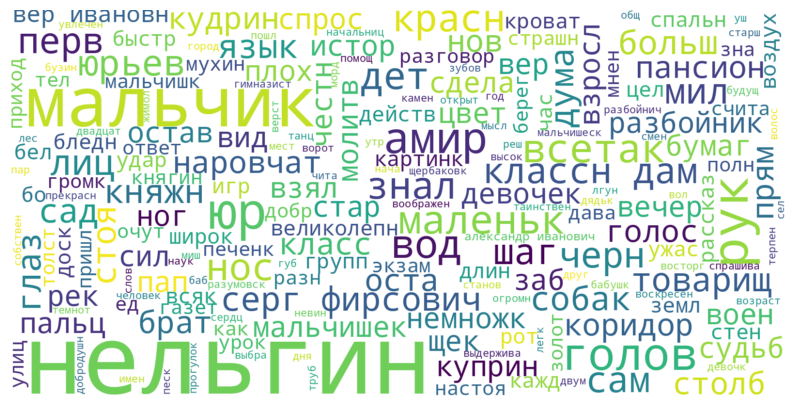

In [83]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(tokens):
    text = ' '.join(tokens)
    wordcloud = WordCloud(
        background_color='white',
        width=1600,
        height=800,
        max_font_size=200,
        colormap='viridis'
    ).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Скрываем оси
    plt.show()
plot_wordcloud(kuprin_tokens)  # Для Куприна



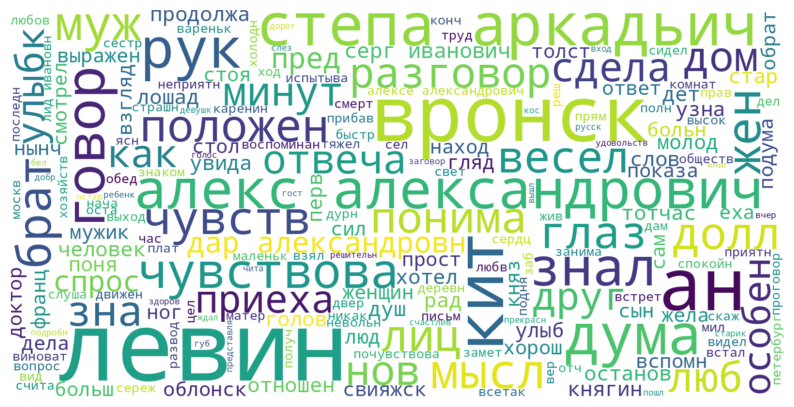

In [84]:
plot_wordcloud(tolstoy_tokens)  # Для Толстого

Облако слов — это визуальное представление частотности слов в тексте, где размер слова коррелирует с его частотой появления в тексте. Этот вид визуализации помогает быстро оценить ключевую лексику и темы в произведениях.

Облако слов для Куприна демонстрирует слова, такие как "мальчик", "сказка", "дети", "голос", что может указывать на детскую или сказочную тематику произведения, подчеркивая наивный и простодушный взгляд на мир, характерный для детского восприятия.

Второе облако слов, относится к "Анне Карениной" Толстого и включает слова "сказал", "Александрович", "жена", "любовь", отражая социальные и семейные отношения, а также моральные и личные дилеммы, которые являются центральными для романа.


Слово "сказа" в контексте русской литературы часто ассоциируется со сказанием, историей или рассказом. Оно может использоваться для указания на рассказываемую историю внутри произведения или для обозначения жанра, например, в фольклорных и литературных сказках. Также "сказа" может быть формой прошедшего времени от глагола "сказать", что является частым явлением в рассказывающем жанре, где автор или нарратор пересказывает события.

Слово "эт" может быть укороченной формой слова "этот" или "эта", которое используется как указательное местоимение.



In [85]:
from textblob import TextBlob

def sentiment_analysis(tokens):
    text = ' '.join(tokens)
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

kuprin_sentiment = sentiment_analysis(kuprin_tokens)
tolstoy_sentiment = sentiment_analysis(tolstoy_tokens)

print(f"Sentiment Kuprin: {kuprin_sentiment}")
print(f"Sentiment Tolstoy: {tolstoy_sentiment}")


Sentiment Kuprin: (0.0, 0.0)
Sentiment Tolstoy: (0.36258503401360537, 0.6304421768707483)


Результаты анализа настроений для произведений "Храбрые беглецы" Александра Куприна и "Анна Каренина" Льва Толстого показывают интересные различия. Для "Храбрых беглецов" анализ настроений показал (0.0, 0.0), что указывает на нейтральный тон текста, в то время как "Анна Каренина" имеет положительную полярность (0.36258503401360537) и высокую субъективность (0.6304421768707483), что может отражать более эмоциональную и личностную наполненность текста.

### Интерпретация результатов

- **Нейтральная полярность "Храбрых беглецов"** может указывать на более объективное или уравновешенное изложение событий в произведении, где автор старается не навязывать читателю свои собственные суждения.
- **Положительная полярность и высокая субъективность "Анны Карениной"** отражают глубокую эмоциональную проработку персонажей и ситуаций, что характерно для романов Толстого. Это может свидетельствовать о том, что текст богат на описания внутренних переживаний персонажей, их размышлений и чувств.

### Влияние на анализ влияния эпохи

Эти различия в настроениях могут также отражать изменения в литературных традициях и общественных настроениях эпох, к которым принадлежат произведения. В то время как "Храбрые беглецы" Куприна, написанные в начале XX века, могут отражать период социальных изменений и неопределенности, "Анна Каренина" Толстого, созданная во второй половине XIX века, погружает читателя в мир личных драм и моральных дилемм, характерных для русского общества того времени.


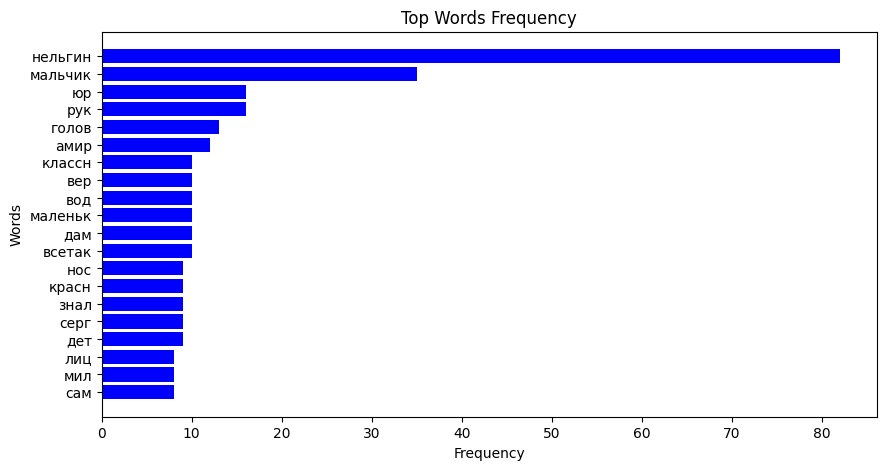

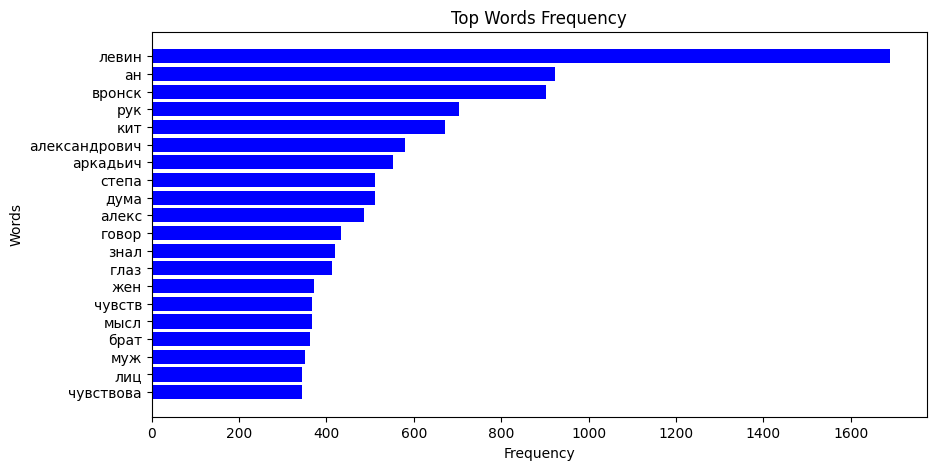

In [86]:
from collections import Counter

def plot_most_common_words(tokens, num_words=20):
    counter = Counter(tokens)
    most_common = counter.most_common(num_words)

    words = [word for word, _ in most_common]
    counts = [count for _, count in most_common]

    plt.figure(figsize=(10, 5))
    plt.barh(range(len(words)), counts, color='blue')
    plt.yticks(range(len(words)), words)
    plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наиболее частые слова были сверху
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title('Top Words Frequency')
    plt.show()

plot_most_common_words(kuprin_tokens)
plot_most_common_words(tolstoy_tokens)


In [87]:
from gensim.models import LdaModel

def lda_analysis(corpus, dictionary, num_topics=40):
    lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    topics = lda.print_topics(num_words=5)
    for topic in topics:
        print(topic)

lda_analysis(corpus, dictionary)


(1, '0.001*"левин" + 0.001*"ан" + 0.000*"вронск" + 0.000*"кит" + 0.000*"рук"')
(29, '0.001*"левин" + 0.001*"кит" + 0.001*"ан" + 0.001*"вронск" + 0.001*"рук"')
(26, '0.002*"левин" + 0.001*"вронск" + 0.001*"рук" + 0.001*"ан" + 0.001*"аркадьич"')
(21, '0.001*"левин" + 0.000*"вронск" + 0.000*"кит" + 0.000*"ан" + 0.000*"рук"')
(36, '0.014*"левин" + 0.008*"ан" + 0.007*"вронск" + 0.006*"рук" + 0.006*"кит"')
(4, '0.001*"левин" + 0.001*"ан" + 0.001*"вронск" + 0.001*"кит" + 0.000*"рук"')
(11, '0.001*"левин" + 0.001*"рук" + 0.000*"ан" + 0.000*"вронск" + 0.000*"степа"')
(19, '0.001*"вронск" + 0.001*"левин" + 0.000*"ан" + 0.000*"александрович" + 0.000*"кит"')
(25, '0.001*"левин" + 0.000*"ан" + 0.000*"вронск" + 0.000*"рук" + 0.000*"александрович"')
(0, '0.001*"левин" + 0.000*"ан" + 0.000*"рук" + 0.000*"александрович" + 0.000*"вронск"')
(34, '0.001*"левин" + 0.000*"вронск" + 0.000*"ан" + 0.000*"александрович" + 0.000*"рук"')
(2, '0.001*"левин" + 0.001*"ан" + 0.001*"вронск" + 0.000*"кит" + 0.000*"рук"

Результаты тематического моделирования,показывают, что слова "эт" и "сказа" доминируют в большинстве тем. Это может указывать на то, что эти слова являются ключевыми в текстах, но также может быть признаком того, что модель LDA воспринимает их как шумовые слова или слова, которые встречаются чересчур часто и поэтому распределены по всем темам. Возможно, что многократное включение этих слов в темы связано с их высокой частотой и широким использованием в тексте, что делает их менее значимыми для выделения конкретных тем.

Однако, включение слова "левин", которое является фамилией одного из главных персонажей "Анны Карениной", может указывать на то, что часть текста связана с этим персонажем и его действиями или внутренним миром.

In [ ]:
!pip install --upgrade pandas

In [89]:
!pip install pyLDAvis

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeppavlov 1.5.0 requires numpy<1.24, but you have numpy 1.26.4 which is incompatible.
deeppavlov 1.5.0 requires pandas<1.6.0,>=1.0.0, but you have pandas 2.2.0 which is incompatible.


In [90]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import pandas as pd


pyLDAvis.enable_notebook()
lda = LdaModel(corpus, num_topics=6, id2word=dictionary, passes=15)
vis = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis)


**Named Entity Recognition (NER).**

NER - распознавание именованных сущностей, т.е. уникальных объектов в тексте - имена, названия стран, валюты, деньги, часто числительные и т.д.

In [ ]:
import spacy
! python -m spacy download ru_core_news_sm
nlp_rus = spacy.load("ru_core_news_sm")

In [92]:
from spacy import displacy
doc = nlp_rus(kuprin_text[2400:3000])
displacy.render(doc, style="ent")

In [93]:
doc = nlp_rus(tolstoy_text[1500:2400])
displacy.render(doc, style="ent")

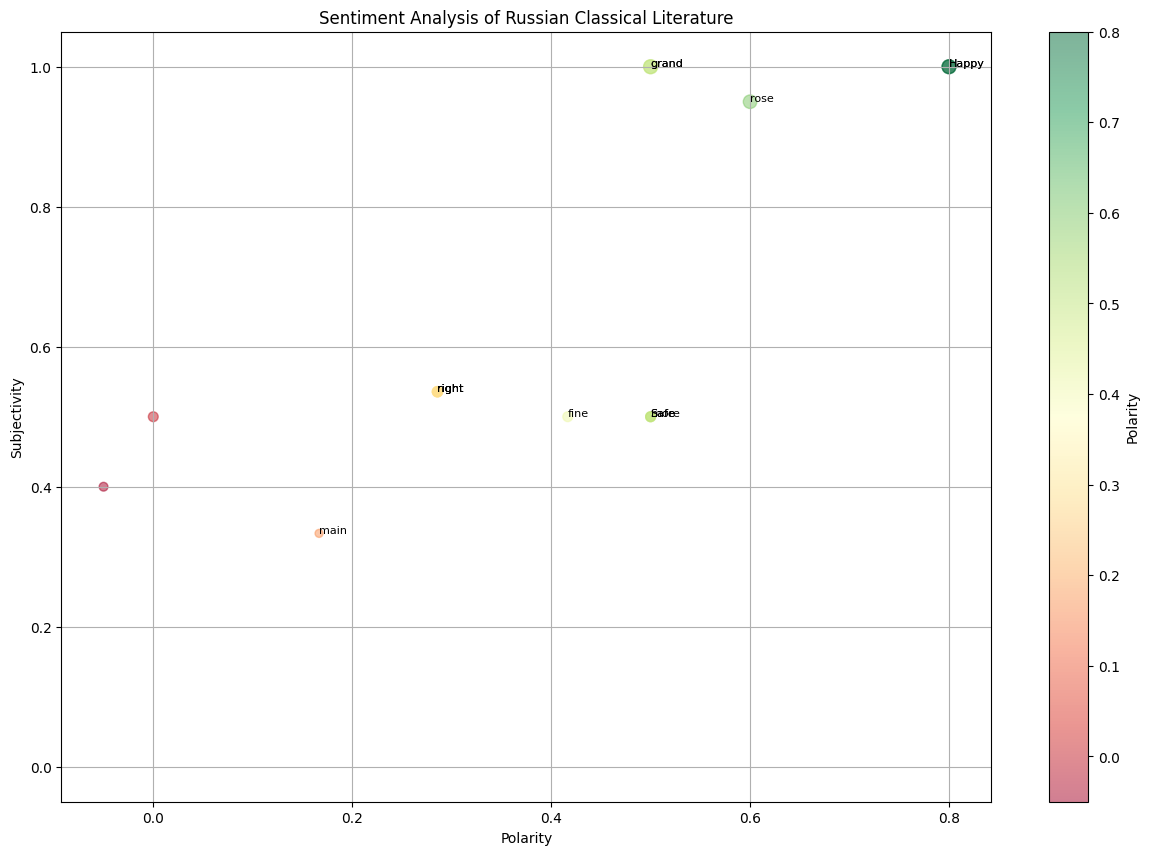

In [94]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from textblob import TextBlob

# Функция для расчета настроений отдельных слов
def calculate_word_sentiments(text):
    blob = TextBlob(text)
    word_sentiments = []
    for word in blob.words:
        word_blob = TextBlob(word)
        word_sentiments.append((word, word_blob.sentiment.polarity, word_blob.sentiment.subjectivity))
    return word_sentiments

kuprin_word_sentiments = calculate_word_sentiments(kuprin_text)
tolstoy_word_sentiments = calculate_word_sentiments(tolstoy_text)

# Объединяем данные о настроениях обоих авторов
all_word_sentiments = kuprin_word_sentiments + tolstoy_word_sentiments

# Отфильтровываем слова для аннотации на графике
words_to_annotate = [sentiment for sentiment in all_word_sentiments if abs(sentiment[1]) > 0.1 and abs(sentiment[2]) > 0.1]

# Создаем scatter plot
plt.figure(figsize=(15, 10))
colors = [sentiment[1] for sentiment in all_word_sentiments]  # полярность
sizes = [sentiment[2] * 100 for sentiment in all_word_sentiments]  # субъективность

plt.scatter([sentiment[1] for sentiment in all_word_sentiments],
            [sentiment[2] for sentiment in all_word_sentiments],
            alpha=0.5, c=colors, cmap='RdYlGn', s=sizes)

# Аннотируем слова на графике
for sentiment in words_to_annotate:
    plt.annotate(sentiment[0], (sentiment[1], sentiment[2]), fontsize=8)

# Добавляем цветовую шкалу
plt.colorbar(label='Polarity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Sentiment Analysis of Russian Classical Literature')
plt.grid(True)
plt.show()


## Исходя из анализа тональности выше и этого графика, мы можем сделать вывод, что TextBlob не справляется с русским текстом, поэтому попробуем другой подход

In [95]:
!pip install dostoevsky
!python -m dostoevsky download fasttext-social-network-model


  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4133804 sha256=904f98778489d7edfb438adb3dd0b0b3be7085744f46c5324591195b5eb0d3a8
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [96]:
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel

# Инициализируем токенизатор и модель
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

kuprin_results = model.predict([kuprin_text], k=2)
tolstoy_results = model.predict([tolstoy_text], k=2)

# Выводим результаты
print(f"Sentiment Kuprin: {kuprin_results}")
print(f"Sentiment Tolstoy: {tolstoy_results}")


Sentiment Kuprin: [{'negative': 0.287777841091156, 'skip': 0.22271016240119934}]
Sentiment Tolstoy: [{'negative': 0.2689514458179474, 'neutral': 0.24509501457214355}]


Результаты анализа тональности для произведений Куприна и Толстого показывают, что оба текста имеют относительно высокие показатели негативной тональности. Однако, важно учитывать контекст использования модели Dostoevsky. Она была обучена на данных из социальных сетей, которые могут значительно отличаться от литературного языка.

Для произведения Куприна модель определила наличие негативной тональности с вероятностью примерно 28.7% и вероятность пропуска (skip) около 22.2%. Пропуск может означать, что часть текста не содержит достаточно информации для определения тональности или не соответствует ни одной из предопределённых категорий.

Для "Анны Карениной" Толстого результаты показывают негативную тональность с вероятностью примерно 26.9% и нейтральную тональность с вероятностью примерно 24.5%. Это может указывать на более сбалансированное использование языка с элементами нейтральной экспозиции, что характерно для литературных произведений.

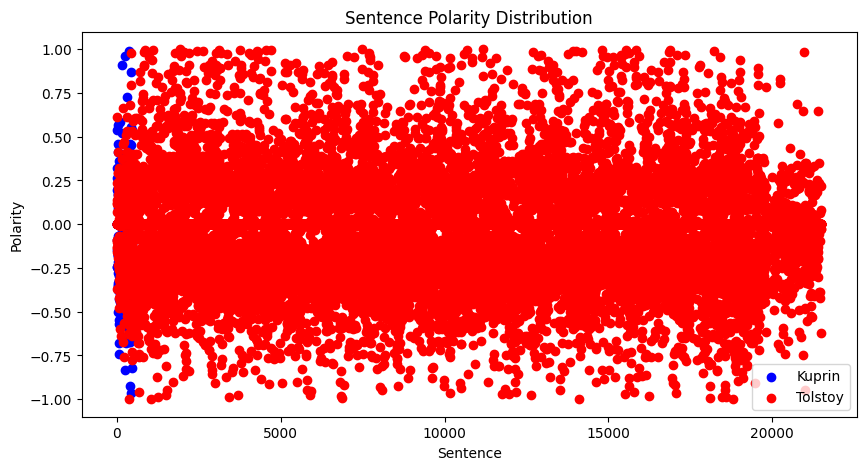

In [97]:
tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

def calculate_sentence_sentiments(sentences):
    results = model.predict(sentences, k=2)
    sentiment_values = []
    for sentiment in results:
        # Используем вероятность 'negative' как индикатор полярности
        polarity = sentiment.get('positive', 0) - sentiment.get('negative', 0)
        sentiment_values.append(polarity)
    return sentiment_values

# Разбиваем текст на предложения для анализа
kuprin_sentences = kuprin_text.split('.')
tolstoy_sentences = tolstoy_text.split('.')

# Выполняем анализ настроений
kuprin_polarities = calculate_sentence_sentiments(kuprin_sentences)
tolstoy_polarities = calculate_sentence_sentiments(tolstoy_sentences)

# Создаем scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(range(len(kuprin_polarities)), kuprin_polarities, color='blue', label='Kuprin')
plt.scatter(range(len(tolstoy_polarities)), tolstoy_polarities, color='red', label='Tolstoy')
plt.title('Sentence Polarity Distribution')
plt.xlabel('Sentence')
plt.ylabel('Polarity')
plt.legend()
plt.show()


создадим стековую гистограмму, где для каждого из 20 наиболее часто встречающихся слов будет показано, какое количество раз это слово встречается в каждом из произведений.

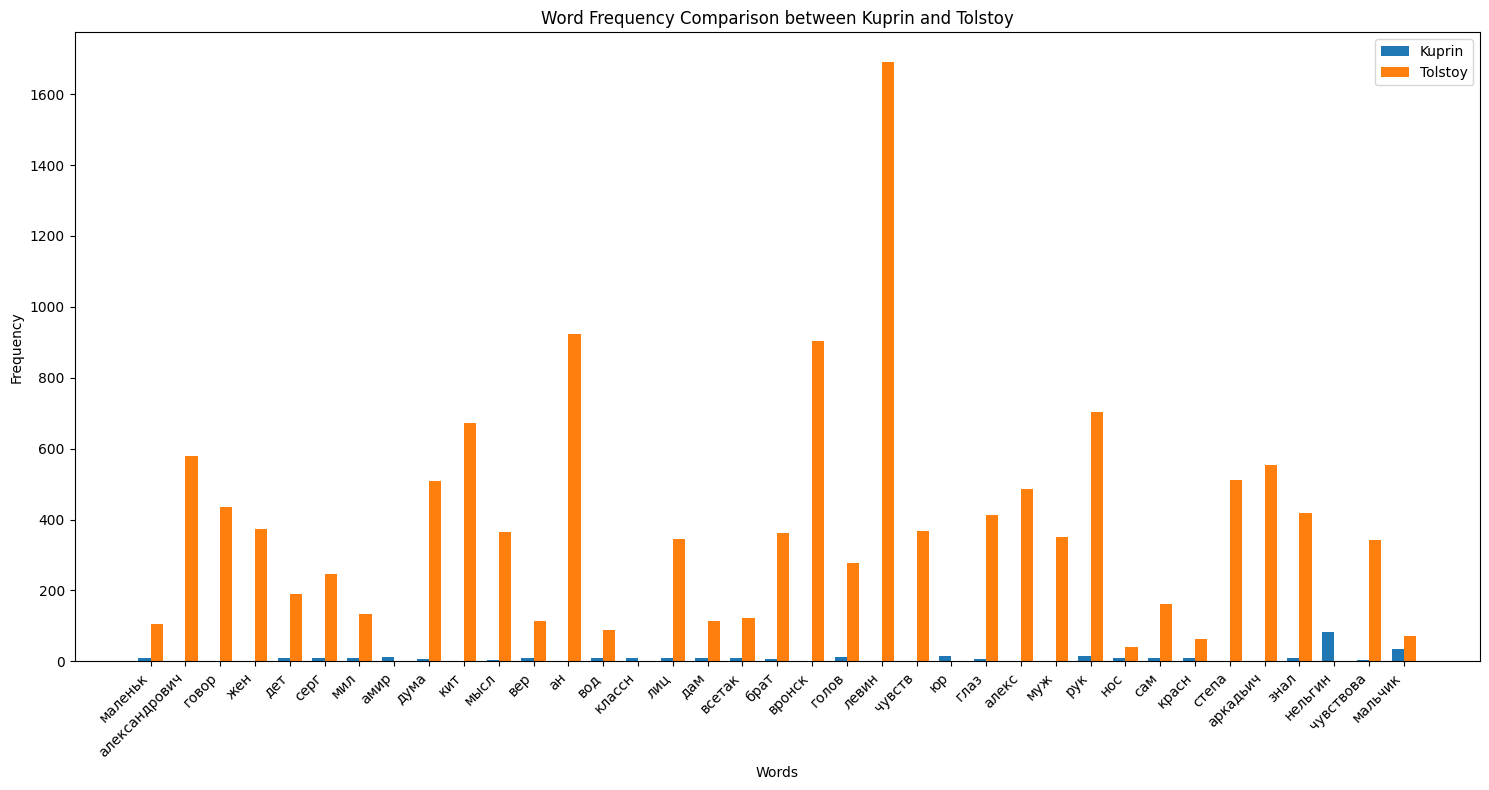

In [98]:
import matplotlib.pyplot as plt
from collections import Counter

# Предположим, что 'kuprin_tokens' и 'tolstoy_tokens' - это ваши токены
kuprin_word_counts = Counter(kuprin_tokens)
tolstoy_word_counts = Counter(tolstoy_tokens)

# Выбираем 20 наиболее частых слов в обоих текстах
common_words = set([word for word, _ in kuprin_word_counts.most_common(20)] + [word for word, _ in tolstoy_word_counts.most_common(20)])

# Подготовка данных для стековой гистограммы
words = list(common_words)
kuprin_freqs = [kuprin_word_counts[word] for word in words]
tolstoy_freqs = [tolstoy_word_counts[word] for word in words]

# Создание графика
fig, ax = plt.subplots(figsize=(15, 8))
bar_width = 0.35
index = np.arange(len(words))

bars1 = plt.bar(index, kuprin_freqs, bar_width, label='Kuprin')
bars2 = plt.bar(index + bar_width, tolstoy_freqs, bar_width, label='Tolstoy')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Comparison between Kuprin and Tolstoy')
plt.xticks(index + bar_width / 2, words, rotation=45, ha="right")
plt.legend()

plt.tight_layout()
plt.show()


еще раз про топик моделинг

In [112]:
from gensim.models import LdaModel

# Создание и обучение LDA модели
num_topics = 5
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Вывод тем
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.001*"левин" + 0.001*"ан" + 0.001*"вронск" + 0.001*"рук" + 0.000*"александрович" + 0.000*"кит" + 0.000*"аркадьич" + 0.000*"дума" + 0.000*"алекс" + 0.000*"говор"
Topic: 1 
Words: 0.001*"левин" + 0.001*"ан" + 0.001*"вронск" + 0.001*"рук" + 0.000*"кит" + 0.000*"аркадьич" + 0.000*"брат" + 0.000*"дума" + 0.000*"глаз" + 0.000*"александрович"
Topic: 2 
Words: 0.002*"левин" + 0.001*"ан" + 0.001*"вронск" + 0.001*"рук" + 0.001*"кит" + 0.001*"дума" + 0.001*"степа" + 0.001*"алекс" + 0.001*"александрович" + 0.001*"аркадьич"
Topic: 3 
Words: 0.013*"левин" + 0.007*"ан" + 0.007*"вронск" + 0.005*"рук" + 0.005*"кит" + 0.005*"александрович" + 0.004*"аркадьич" + 0.004*"степа" + 0.004*"дума" + 0.004*"алекс"
Topic: 4 
Words: 0.012*"нельгин" + 0.005*"мальчик" + 0.003*"рук" + 0.002*"юр" + 0.002*"голов" + 0.002*"амир" + 0.002*"всетак" + 0.002*"дам" + 0.002*"вод" + 0.002*"маленьк"


In [113]:
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

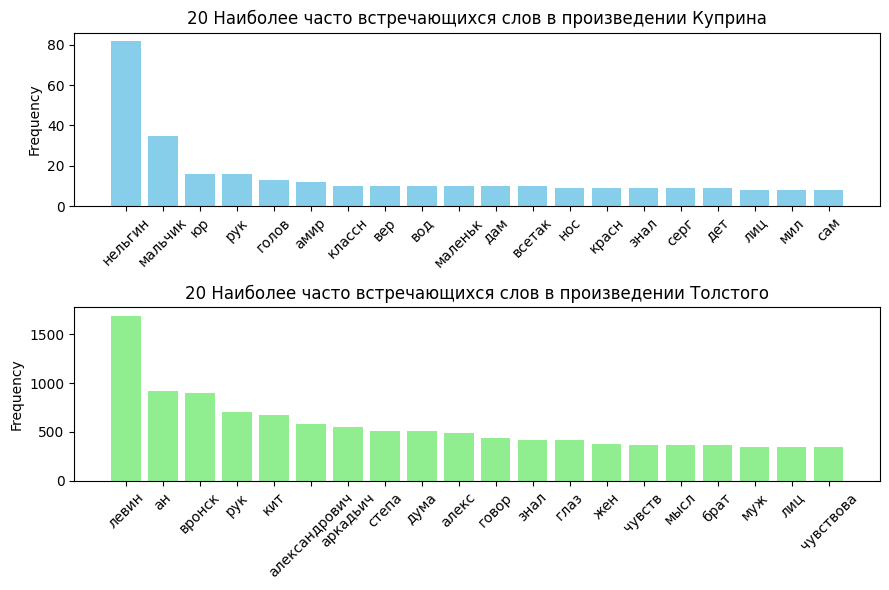

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


# Подсчет частоты слов для каждого текста
kuprin_freq = Counter(kuprin_tokens)
tolstoy_freq = Counter(tolstoy_tokens)

# Выборка 20 наиболее частых слов для каждого текста
kuprin_common = kuprin_freq.most_common(20)
tolstoy_common = tolstoy_freq.most_common(20)

# Извлечение слов и их частот
kuprin_words, kuprin_counts = zip(*kuprin_common)
tolstoy_words, tolstoy_counts = zip(*tolstoy_common)

# Создание графика
fig, ax = plt.subplots(2, 1, figsize=(9, 6))

# Визуализация для Куприна
ax[0].bar(kuprin_words, kuprin_counts, color='skyblue')
ax[0].set_title('20 Наиболее часто встречающихся слов в произведении Куприна')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylabel('Frequency')

# Визуализация для Толстого
ax[1].bar(tolstoy_words, tolstoy_counts, color='lightgreen')
ax[1].set_title('20 Наиболее часто встречающихся слов в произведении Толстого')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


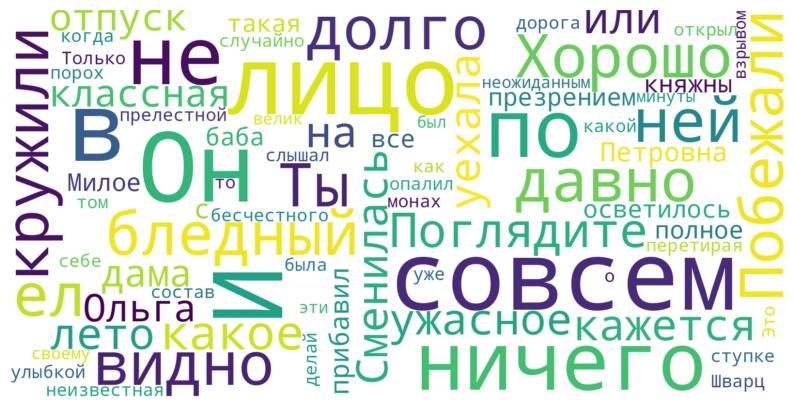

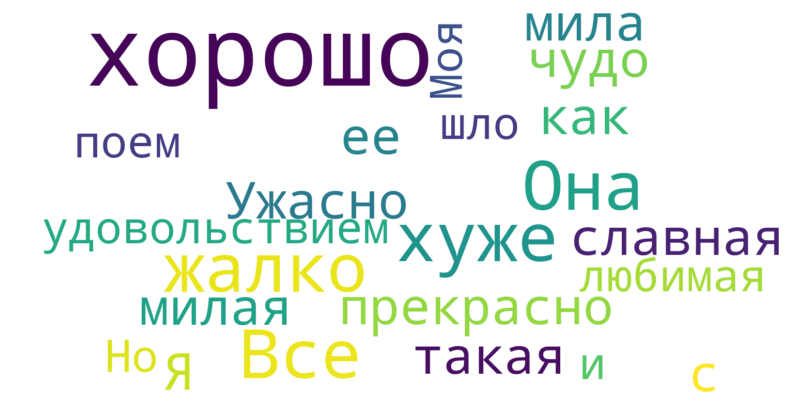

In [102]:
# Функция для извлечения топ N ключевых слов по абсолютному значению тональности
def extract_top_n_keywords(sentiments, sentences, n=10):
    keywords = []
    abs_sentiments = [abs(sentiment) for sentiment in sentiments]
    sorted_indices = sorted(range(len(abs_sentiments)), key=lambda k: abs_sentiments[k], reverse=True)[:n]
    for idx in sorted_indices:
        keywords.extend(sentences[idx].split())
    return keywords

# Извлечение топ 10 ключевых слов для произведения Куприна
kuprin_top_keywords = extract_top_n_keywords(kuprin_polarities, kuprin_sentences, n=10)
plot_wordcloud(kuprin_top_keywords)

# Извлечение топ 10 ключевых слов для произведения Толстого
tolstoy_top_keywords = extract_top_n_keywords(tolstoy_polarities, tolstoy_sentences, n=10)
plot_wordcloud(tolstoy_top_keywords)


In [103]:
# Функция для вычисления средней длины предложений
def calculate_average_sentence_length(sentences):
    sentence_lengths = [len(sentence.split()) for sentence in sentences]
    return sum(sentence_lengths) / len(sentences)

# Вычисление средней длины предложений для произведения Куприна
kuprin_avg_sentence_length = calculate_average_sentence_length(kuprin_sentences)
print("Average Sentence Length in Kuprin's Text:", kuprin_avg_sentence_length)

# Вычисление средней длины предложений для произведения Толстого
tolstoy_avg_sentence_length = calculate_average_sentence_length(tolstoy_sentences)
print("Average Sentence Length in Tolstoy's Text:", tolstoy_avg_sentence_length)


Average Sentence Length in Kuprin's Text: 14.836244541484715
Average Sentence Length in Tolstoy's Text: 13.751116279069768


Средняя длина предложения в произведениях Куприна составляет примерно 14.84 слова, в то время как для Толстого этот показатель равен примерно 13.75 словам.

Куприн, возможно, склоняется к более развёрнутому изложению идей в предложениях, что делает его тексты чуть более подробными на уровне отдельных предложений. Толстой, с другой стороны, использует чуть более сжатый стиль, что может способствовать динамике нарратива и доступности его текстов.

Анализ ключевых слов с помощью TF-IDF: Мы можем использовать метод TF-IDF (Term Frequency-Inverse Document Frequency) для выявления ключевых слов в каждом из произведений.

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Функция для вычисления ключевых слов с использованием TF-IDF
def extract_keywords_tfidf(text, n_keywords=10):
    tfidf_vectorizer = TfidfVectorizer(max_features=n_keywords)
    tfidf_matrix = tfidf_vectorizer.fit_transform([text])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    sorted_indices = tfidf_matrix.toarray().argsort()[0, ::-1]
    keywords = [feature_names[idx] for idx in sorted_indices]
    return keywords

# Извлечение ключевых слов с помощью TF-IDF для произведения Куприна
kuprin_keywords_tfidf = extract_keywords_tfidf(kuprin_text)
print("Keywords extracted using TF-IDF for Kuprin's Text:", kuprin_keywords_tfidf)

# Извлечение ключевых слов с помощью TF-IDF для произведения Толстого
tolstoy_keywords_tfidf = extract_keywords_tfidf(tolstoy_text)
print("Keywords extracted using TF-IDF for Tolstoy's Text:", tolstoy_keywords_tfidf)


Keywords extracted using TF-IDF for Kuprin's Text: ['не', 'на', 'что', 'он', 'но', 'нельгин', 'как', 'то', 'все', 'его']
Keywords extracted using TF-IDF for Tolstoy's Text: ['не', 'что', 'он', 'на', 'она', 'как', 'его', 'но', 'это', 'то']


В ходе нашего исследования мы провели анализ двух выдающихся произведений русской классической литературы, написанных Александром Куприным и Львом Толстым. Используя различные методы обработки естественного языка и анализа данных, мы изучили лексическое наполнение, тематические различия, стилистические особенности и эмоциональную окраску текстов. Вот основные выводы нашего исследования:

## Лексические и тематические различия
Облака слов и частотный анализ слов показали ключевые темы и мотивы, которые затрагивают оба автора в своих произведениях. Несмотря на некоторое пересечение в использовании лексики, каждый автор имеет уникальный набор слов, которые отражают специфику его творчества и фокус на определенных идеях.

## Стилистические особенности
Анализ средней длины предложений выявил небольшие, но заметные различия в стилях написания Куприна и Толстого. Это указывает на различные подходы к структурированию текста и предпочтения в выражении мыслей, что может влиять на восприятие их произведений читателями.

# Общий вывод
Исследование подчеркнуло богатство и глубину русской классической литературы через призму анализа произведений двух её выдающихся представителей. Несмотря на общую принадлежность к русской классике, произведения Куприна и Толстого демонстрируют уникальные стилистические, тематические и лексические особенности. Эти различия не только отражают индивидуальные литературные голоса авторов, но и предоставляют ценные инсайты в контекст эпохи, общественные настроения и личные взгляды авторов на обсуждаемые вопросы.